**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../config/config_sing.R")))
show_env()

You are in Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/out 
CODE DIRECTORY (FD_CODE): /data/reddylab/Kuei/code 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/code/Proj_CombEffect_ENCODE_FCC 
PATH OF RESULTS (FD_RES): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc 
PATH OF LOG     (FD_LOG): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc/log 


## Import data

**Score**

In [2]:
### set file directories
fdiry = file.path(FD_RES, "results", "comparison")
fname = "result.ranknorm.starrmpra.tsv"
fpath = file.path(fdiry, fname)

### read data
dat = read_tsv(fpath)

### assign and show
dat_peak_summary_starrmpra = dat
print(dim(dat))
head(dat)

Rows: 5166 Columns: 10
── Column specification ─────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (6): Chrom, Peak, TMPRA_Gene, TMPRA_Dataset, CRISPR_HCFF, Assay
dbl (4): Start, End, Log2FC, RankNorm_Total

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 5166   10


Chrom,Start,End,Peak,TMPRA_Gene,TMPRA_Dataset,CRISPR_HCFF,Assay,Log2FC,RankNorm_Total
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
chr11,4539569,4540043,chr11:4539569-4540043,HBE1,OL45,"HBE1,HBG1,HBG2,HBS1L,MYB",ASTARR,0.14501695,0.6550523
chr11,4551336,4552012,chr11:4551336-4552012,HBE1,OL45,NA,ASTARR,0.32125162,0.7560976
chr11,4553969,4555012,chr11:4553969-4555012,HBE1,OL45,NA,ASTARR,0.14529397,0.6556330
chr11,4569016,4569992,chr11:4569016-4569992,HBE1,OL45,NA,ASTARR,0.01136464,0.5673635
chr11,4577444,4578031,chr11:4577444-4578031,HBE1,OL45,NA,ASTARR,0.24524353,0.7154472
chr11,4601808,4602487,chr11:4601808-4602487,HBE1,OL45,NA,ASTARR,-0.57215284,0.1277584


In [3]:
### set file directories
fdiry = file.path(FD_RES, "results", "comparison")
fname = "result.ranknorm.starrmpra.crispr.tsv"
fpath = file.path(fdiry, fname)

### read data
dat = read_tsv(fpath)

### assign and show
dat_peak_score_starrmpra_crispr = dat
print(dim(dat))
head(dat)

Rows: 1722 Columns: 13
── Column specification ─────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (2): Peak, CRISPRi_HCRFF_Note
dbl (11): RankNorm, CRISPRi_HCRFF_Tot, CRISPRi_HCRFF_Pos, CRISPRi_HCRFF_Neg,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 1722   13


Peak,RankNorm,CRISPRi_HCRFF_Tot,CRISPRi_HCRFF_Pos,CRISPRi_HCRFF_Neg,CRISPRi_HCRFF_Count,CRISPRi_HCRFF_Note,CRISPRi_Growth_Tot,CRISPRi_Growth_Pos,CRISPRi_Growth_Neg,CRISPRi_Growth_Count,LMPRA_Tot,LMPRA_Count
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr11:32870601-32871324,0.1445993,NA,NA,NA,NA,NA,-0.0420142,0.2160544,-0.3000828,10,NA,NA
chr11:32874343-32875070,0.2466125,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
chr11:32884749-32885822,0.3211382,NA,NA,NA,NA,NA,NA,NA,NA,NA,0.163440,200
chr11:32892099-32894437,0.7084785,NA,NA,NA,NA,NA,-0.0965777,0.4237940,-0.3195941,10,NA,NA
chr11:32901572-32902485,0.2684863,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
chr11:32903491-32904506,0.2586140,NA,NA,NA,NA,NA,NA,NA,NA,NA,0.077066,91


**Annotation**

In [24]:
### setup file path
fdiry = file.path(
    FD_RES, 
    "results", 
    "region", 
    "KS91_K562_ASTARRseq_peak_macs_input", 
    "summary")
fnames = dir(fdiry)

### setup labels for annotation file
lst = str_split(fnames, "\\.") 
lst = lapply(lst, function(vec){
    res = vec[-c(1, 2, length(vec))]
    res = paste(res, collapse=".")
    return(res)
})
vec = unlist(lst)

### import data
lst = lapply(fnames, function(fname){
    fpath = file.path(fdiry, fname)
    dat   = read_tsv(fpath, show_col_types = FALSE)
    return(dat)
})
names(lst) = vec

### assign and show
lst_dat_annot = lst
print(names(lst))
head(lst[[1]])

 [1] "ccre_v3"                         "ccre_v4"                        
 [3] "chipseq_histone"                 "chipseq_tf_subset"              
 [5] "crispri_growth_dhs"              "crispri_hcrff_casa"             
 [7] "enhancer_zscore_junke.ASTARR_A"  "enhancer_zscore_junke.ASTARR_AB"
 [9] "enhancer_zscore_junke.ASTARR_R"  "enhancer_zscore_junke.ASTARR"   
[11] "enhancer_zscore_junke.LMPRA_A"   "enhancer_zscore_junke.LMPRA_AB" 
[13] "enhancer_zscore_junke.LMPRA_R"   "enhancer_zscore_junke.LMPRA"    
[15] "enhancer_zscore_junke.STARRMPRA" "enhancer_zscore_junke.TMPRA_A"  
[17] "enhancer_zscore_junke.TMPRA_R"   "enhancer_zscore_junke.TMPRA"    
[19] "enhancer_zscore_junke.WSTARR_A"  "enhancer_zscore_junke.WSTARR_AB"
[21] "enhancer_zscore_junke.WSTARR_R"  "enhancer_zscore_junke.WSTARR"   
[23] "tss_pol2"                       


Peak,Annotation,Label,Count,Region,Score,Note
<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>
chr1:180982-182087,ccre_v3,DNase-only,1,chr1:181251-181601,0,EH38E1310153:DNase-only
chr1:777949-779437,ccre_v3,PLS,1,chr1:779086-779355,0,EH38E1310159:PLS
chr1:777949-779437,ccre_v3,"PLS,CTCF-bound",1,chr1:778562-778912,0,"EH38E1310158:PLS,CTCF-bound"
chr1:816774-817547,ccre_v3,Low-DNase,1,chr1:817080-817403,0,EH38E1310166:Low-DNase
chr1:817905-818348,ccre_v3,Low-DNase,1,chr1:817903-818252,0,EH38E1310167:Low-DNase
chr1:818602-819380,ccre_v3,Low-DNase,1,chr1:818718-818872,0,EH38E1310168:Low-DNase


## Setup plot parameters

In [55]:
dat = dat_peak_score_starrmpra_crispr
dat = dat %>% arrange(RankNorm)

VEC_PEAKS  = dat$Peak
VEC_ASSAYS = c("ASTARR", "WSTARR", "TMPRA")

In [56]:
THEME_TEXT = theme(
    axis.ticks.x = element_blank(),
    axis.text.x  = element_blank(),
    axis.text.y  = element_text(size = 15),
    axis.title.x = element_blank(),
    axis.title.y = element_blank(),
    plot.title = element_text(face = "bold", size = 17)
    #plot.title = element_text(face = "plain", size = 17)
)

## Plot scores

**STARR/TMPRA**

In [57]:
dat = dat_peak_summary_starrmpra
dat = dat %>% 
    dplyr::mutate(
        Assay = factor(Assay, levels=VEC_ASSAYS),
        Peak  = factor(Peak,  levels=VEC_PEAKS),
        Score = RankNorm_Total
    )

dat_score_starrmpra = dat
print(dim(dat))
head(dat)

[1] 5166   11


Chrom,Start,End,Peak,TMPRA_Gene,TMPRA_Dataset,CRISPR_HCFF,Assay,Log2FC,RankNorm_Total,Score
<chr>,<dbl>,<dbl>,<fct>,<chr>,<chr>,<chr>,<fct>,<dbl>,<dbl>,<dbl>
chr11,4539569,4540043,chr11:4539569-4540043,HBE1,OL45,"HBE1,HBG1,HBG2,HBS1L,MYB",ASTARR,0.14501695,0.6550523,0.6550523
chr11,4551336,4552012,chr11:4551336-4552012,HBE1,OL45,NA,ASTARR,0.32125162,0.7560976,0.7560976
chr11,4553969,4555012,chr11:4553969-4555012,HBE1,OL45,NA,ASTARR,0.14529397,0.6556330,0.6556330
chr11,4569016,4569992,chr11:4569016-4569992,HBE1,OL45,NA,ASTARR,0.01136464,0.5673635,0.5673635
chr11,4577444,4578031,chr11:4577444-4578031,HBE1,OL45,NA,ASTARR,0.24524353,0.7154472,0.7154472
chr11,4601808,4602487,chr11:4601808-4602487,HBE1,OL45,NA,ASTARR,-0.57215284,0.1277584,0.1277584


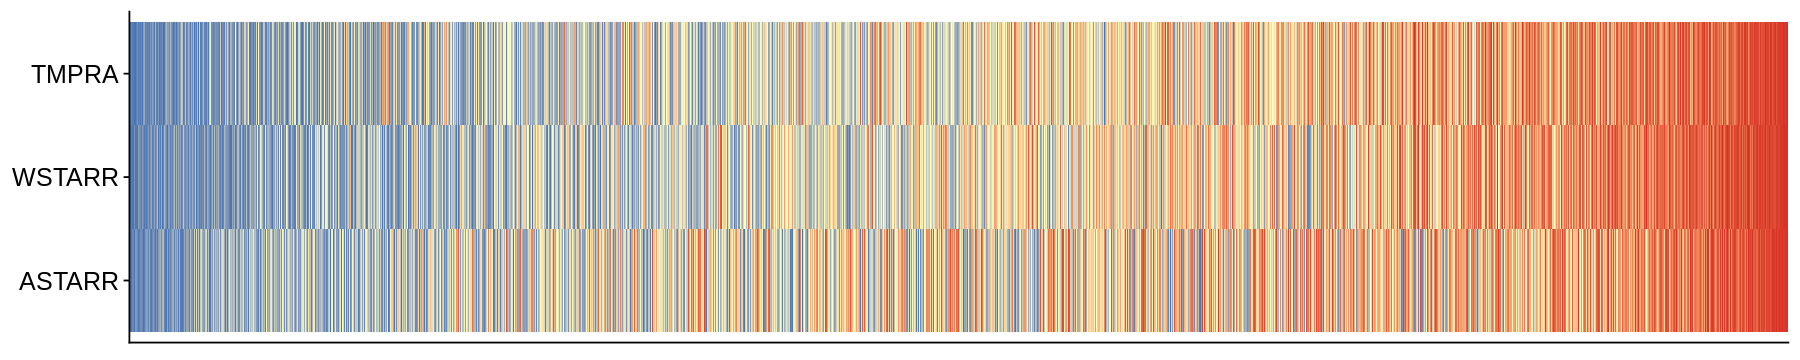

In [61]:
### setup theme
theme_fill = scale_fill_gradient2(
    low  = "#4575b4",
    mid  = "#ffffbf",
    high = "#d73027",
    midpoint = 0.5
)
theme_text = THEME_TEXT
theme_legend = theme(legend.position = "none")

### plot and assign
dat = dat_score_starrmpra
gpt = ggplot(dat, aes(x=Peak, y=Assay, fill=Score)) +
    geom_tile() +
    labs(x="Open Chromatin Regions") +
    theme_cowplot() + 
    theme_text +
    theme_fill +
    theme_legend
gpt_score_starrmpra = gpt + theme(legend.position = "none")

### show the plot
options(repr.plot.height=3, repr.plot.width=15)
print(gpt)

**CRISPRi-HCRFF**

In [62]:
dat = dat_peak_score_starrmpra_crispr
dat = dat %>% 
    dplyr::select(Peak, CRISPRi_HCRFF_Pos, CRISPRi_HCRFF_Neg) %>%
    tidyr::gather(Group, Score, -Peak) %>%
    dplyr::mutate(Peak  = factor(Peak,  levels=VEC_PEAKS)) %>%
    replace(is.na(.), 0)

dat_score_crispri_hcrff = dat
print(dim(dat))
head(dat)

[1] 3444    3


Peak,Group,Score
<fct>,<chr>,<dbl>
chr11:32870601-32871324,CRISPRi_HCRFF_Pos,0
chr11:32874343-32875070,CRISPRi_HCRFF_Pos,0
chr11:32884749-32885822,CRISPRi_HCRFF_Pos,0
chr11:32892099-32894437,CRISPRi_HCRFF_Pos,0
chr11:32901572-32902485,CRISPRi_HCRFF_Pos,0
chr11:32903491-32904506,CRISPRi_HCRFF_Pos,0


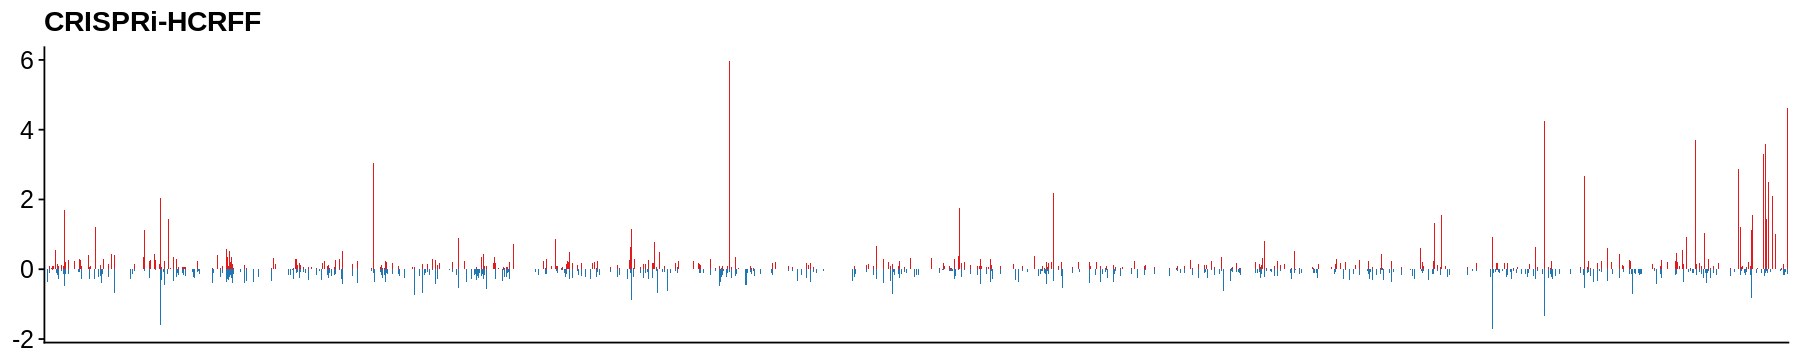

In [64]:
### setup theme
theme_fill = scale_fill_manual(
    values = c(
        "CRISPRi_HCRFF_Pos"="#e31a1c", 
        "CRISPRi_HCRFF_Neg"="#1f78b4")
)
theme_text = THEME_TEXT
theme_legend = theme(legend.position = "none")

### plot and assign
dat = dat_score_crispri_hcrff
gpt = ggplot(dat, aes(x=Peak, y=Score, fill=Group)) + 
    geom_bar(stat="identity", position="identity") + 
    labs(title = "CRISPRi-HCRFF") +
    theme_cowplot() + 
    theme_text +
    theme_fill +
    theme_legend
gpt_score_crispri_hcrff = gpt

### show the plot
options(repr.plot.height=3, repr.plot.width=15)
print(gpt)

**CRISPRi-Growth**

In [65]:
dat = dat_peak_score_starrmpra_crispr
dat = dat %>% 
    dplyr::select(Peak, CRISPRi_Growth_Tot) %>%
    dplyr::mutate(
        Peak  = factor(Peak,  levels=VEC_PEAKS),
        Score = CRISPRi_Growth_Tot) %>%
    replace(is.na(.), 0)

dat_score_crispri_growth = dat
print(dim(dat))
head(dat)

[1] 1722    3


Peak,CRISPRi_Growth_Tot,Score
<fct>,<dbl>,<dbl>
chr11:32870601-32871324,-0.0420142,-0.0420142
chr11:32874343-32875070,0.0000000,0.0000000
chr11:32884749-32885822,0.0000000,0.0000000
chr11:32892099-32894437,-0.0965777,-0.0965777
chr11:32901572-32902485,0.0000000,0.0000000
chr11:32903491-32904506,0.0000000,0.0000000


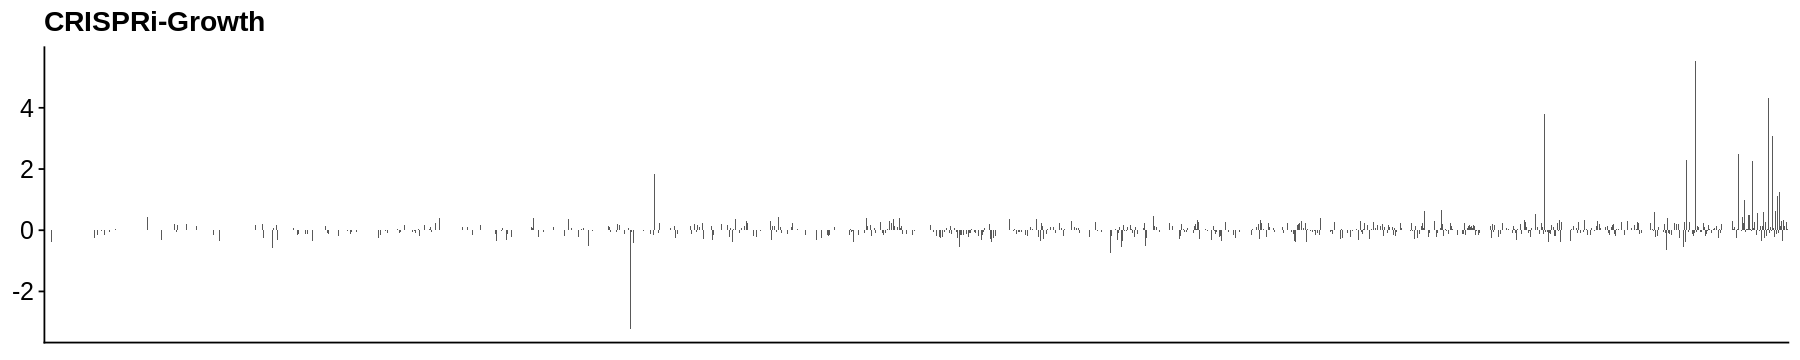

In [70]:
### setup theme
theme_text = THEME_TEXT
theme_legend = theme(legend.position = "none")
theme_legend = theme(legend.position = "none")

### plot and assign
dat = dat_score_crispri_growth
gpt = ggplot(dat, aes(x=Peak, y=Score)) + 
    geom_bar(stat="identity", position="identity") + 
    labs(title = "CRISPRi-Growth") +
    theme_cowplot() + 
    theme_text +
    theme_legend
gpt_score_crispri_growth = gpt

### show the plot
options(repr.plot.height=3, repr.plot.width=15)
print(gpt)

**LentiMPRA**

In [68]:
dat = dat_peak_score_starrmpra_crispr
dat = dat %>% 
    dplyr::select(Peak, LMPRA_Tot) %>%
    dplyr::mutate(
        Peak  = factor(Peak,  levels=VEC_PEAKS),
        Score = LMPRA_Tot) %>%
    replace(is.na(.), 0)

dat_score_lmpra = dat
print(dim(dat))
head(dat)

[1] 1722    3


Peak,LMPRA_Tot,Score
<fct>,<dbl>,<dbl>
chr11:32870601-32871324,0.000000,0.000000
chr11:32874343-32875070,0.000000,0.000000
chr11:32884749-32885822,0.163440,0.163440
chr11:32892099-32894437,0.000000,0.000000
chr11:32901572-32902485,0.000000,0.000000
chr11:32903491-32904506,0.077066,0.077066


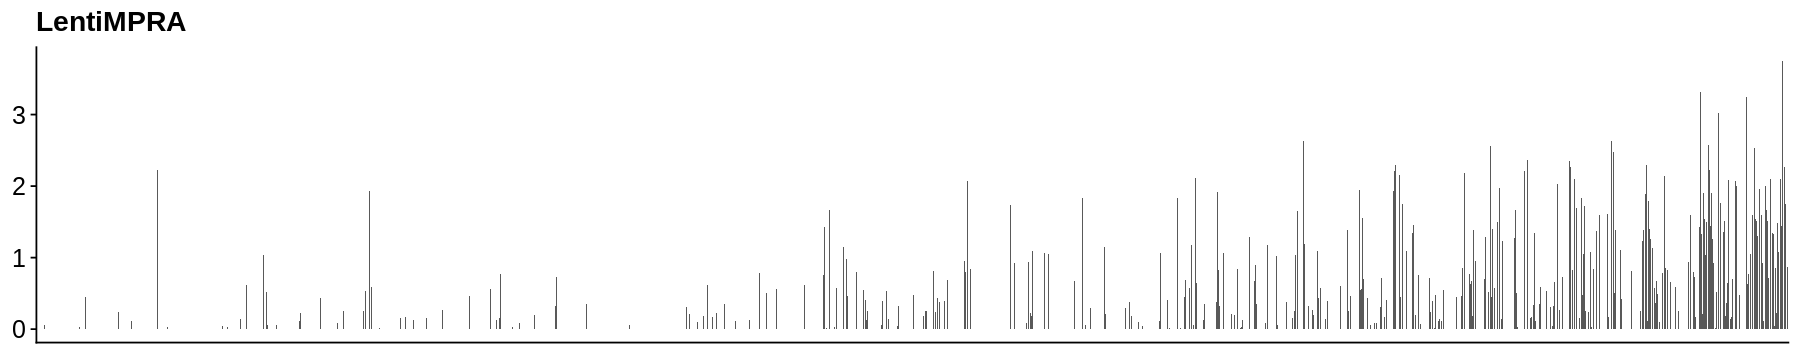

In [69]:
### setup theme
theme_text = THEME_TEXT
theme_legend = theme(legend.position = "none")
theme_legend = theme(legend.position = "none")

### plot and assign
dat = dat_score_lmpra
gpt = ggplot(dat, aes(x=Peak, y=Score)) + 
    geom_bar(stat="identity", position="identity") + 
    labs(title = "LentiMPRA") +
    theme_cowplot() + 
    theme_text +
    theme_legend
gpt_score_lmpra = gpt

### show the plot
options(repr.plot.height=3, repr.plot.width=15)
print(gpt)

## Plot annotation

In [75]:
lst = lst_dat_annot
print(names(lst))

 [1] "ccre_v3"                         "ccre_v4"                        
 [3] "chipseq_histone"                 "chipseq_tf_subset"              
 [5] "crispri_growth_dhs"              "crispri_hcrff_casa"             
 [7] "enhancer_zscore_junke.ASTARR_A"  "enhancer_zscore_junke.ASTARR_AB"
 [9] "enhancer_zscore_junke.ASTARR_R"  "enhancer_zscore_junke.ASTARR"   
[11] "enhancer_zscore_junke.LMPRA_A"   "enhancer_zscore_junke.LMPRA_AB" 
[13] "enhancer_zscore_junke.LMPRA_R"   "enhancer_zscore_junke.LMPRA"    
[15] "enhancer_zscore_junke.STARRMPRA" "enhancer_zscore_junke.TMPRA_A"  
[17] "enhancer_zscore_junke.TMPRA_R"   "enhancer_zscore_junke.TMPRA"    
[19] "enhancer_zscore_junke.WSTARR_A"  "enhancer_zscore_junke.WSTARR_AB"
[21] "enhancer_zscore_junke.WSTARR_R"  "enhancer_zscore_junke.WSTARR"   
[23] "tss_pol2"                       


In [100]:
### init
lst = list()

###
txt = "Peak calls"
vec = c(
    "ASTARR_AB", "ASTARR_A", "ASTARR_R", 
    "WSTARR_AB", "WSTARR_A", "WSTARR_R", 
                 "TMPRA_A",  "TMPRA_R",
    "LMPRA_AB",  "LMPRA_A",  "LMPRA_R"
)
vec = paste("enhancer_zscore_junke", vec, sep=".")
lst[[txt]] = vec

txt = "Enhancer"
vec = c("ASTARR_AB", "WSTARR_AB", "TMPRA_A", "LMPRA_AB")
vec = paste("enhancer_zscore_junke", vec, sep=".")
lst[[txt]] = vec

txt = "CRISPRi"
vec = c("crispri_hcrff_casa", "crispri_growth_dhs")
lst[[txt]] = vec

txt = "TSS (K562; NCBI RefSeq + POLR2A)"
lst[[txt]] = "tss_pol2"

txt = "cCREs (K562; ENCODE V4)"
lst[[txt]] = "ccre_v4"

txt = "ChIP-seq Histone (K562)"
lst[[txt]] = "chipseq_histone"

txt = "ChIP-seq TF (K562)"
lst[[txt]] = "chipseq_histone"

lst_ant_group = lst
print(lst)

$`Peak calls`
 [1] "enhancer_zscore_junke.ASTARR_AB" "enhancer_zscore_junke.ASTARR_A" 
 [3] "enhancer_zscore_junke.ASTARR_R"  "enhancer_zscore_junke.WSTARR_AB"
 [5] "enhancer_zscore_junke.WSTARR_A"  "enhancer_zscore_junke.WSTARR_R" 
 [7] "enhancer_zscore_junke.TMPRA_A"   "enhancer_zscore_junke.TMPRA_R"  
 [9] "enhancer_zscore_junke.LMPRA_AB"  "enhancer_zscore_junke.LMPRA_A"  
[11] "enhancer_zscore_junke.LMPRA_R"  

$Enhancer
[1] "enhancer_zscore_junke.ASTARR_AB" "enhancer_zscore_junke.WSTARR_AB"
[3] "enhancer_zscore_junke.TMPRA_A"   "enhancer_zscore_junke.LMPRA_AB" 

$CRISPRi
[1] "crispri_hcrff_casa" "crispri_growth_dhs"

$`TSS (K562; NCBI RefSeq + POLR2A)`
[1] "tss_pol2"

$`cCREs (K562; ENCODE V4)`
[1] "ccre_v4"

$`ChIP-seq Histone (K562)`
[1] "chipseq_histone"

$`ChIP-seq TF (K562)`
[1] "chipseq_histone"



In [101]:
lst = lst_ant_group

lst = lapply(lst, function(vec){
    ### get annotation
    lst = lst_dat_annot
    dat = bind_rows(lst[vec])
    lst = split(dat, dat$Label)
    lst_annot = lst

    ### annotate peaks
    dat = data.frame(Peak = VEC_PEAKS)
    for (idx in names(lst_annot)){
        ant = lst_annot[[idx]]
        vec = ant$Peak
        dat[[idx]] = ifelse(dat$Peak %in% vec, "1", "0")
    }

    ### arrange results
    dat = dat %>% 
        tidyr::gather(Label, Value, -Peak) %>%
        dplyr::mutate(Peak  = factor(Peak,  levels=VEC_PEAKS))
})

lst_dat = lst
print(names(lst))
head(lst[[1]])

[1] "Peak calls"                       "Enhancer"                        
[3] "CRISPRi"                          "TSS (K562; NCBI RefSeq + POLR2A)"
[5] "cCREs (K562; ENCODE V4)"          "ChIP-seq Histone (K562)"         
[7] "ChIP-seq TF (K562)"              


,Peak,Label,Value
,<fct>,<chr>,<chr>
1,chrX:48996933-48997220,ASTARR_A,0
2,chr8:128298518-128298762,ASTARR_A,0
3,chr8:128242220-128242507,ASTARR_A,0
4,chr11:34024311-34024546,ASTARR_A,0
5,chr8:128189792-128190210,ASTARR_A,0
6,chr20:56703281-56703575,ASTARR_A,0


In [102]:
theme_fill   = scale_fill_manual(values = c("1" = "black", "0" = "white"))
theme_text   = THEME_TEXT
theme_legend = theme(legend.position = "none")

lst = lst_dat
lst = lapply(names(lst), function(txt){

    dat = lst[[txt]]

    gpt = ggplot(dat, aes(x=Peak, y=Label, fill=Value)) +
        geom_tile() +
        labs(title = txt) +
        theme_cowplot() +
        theme_fill +
        theme_text +
        theme_legend

    return(gpt)
})

lst_gpt = lst

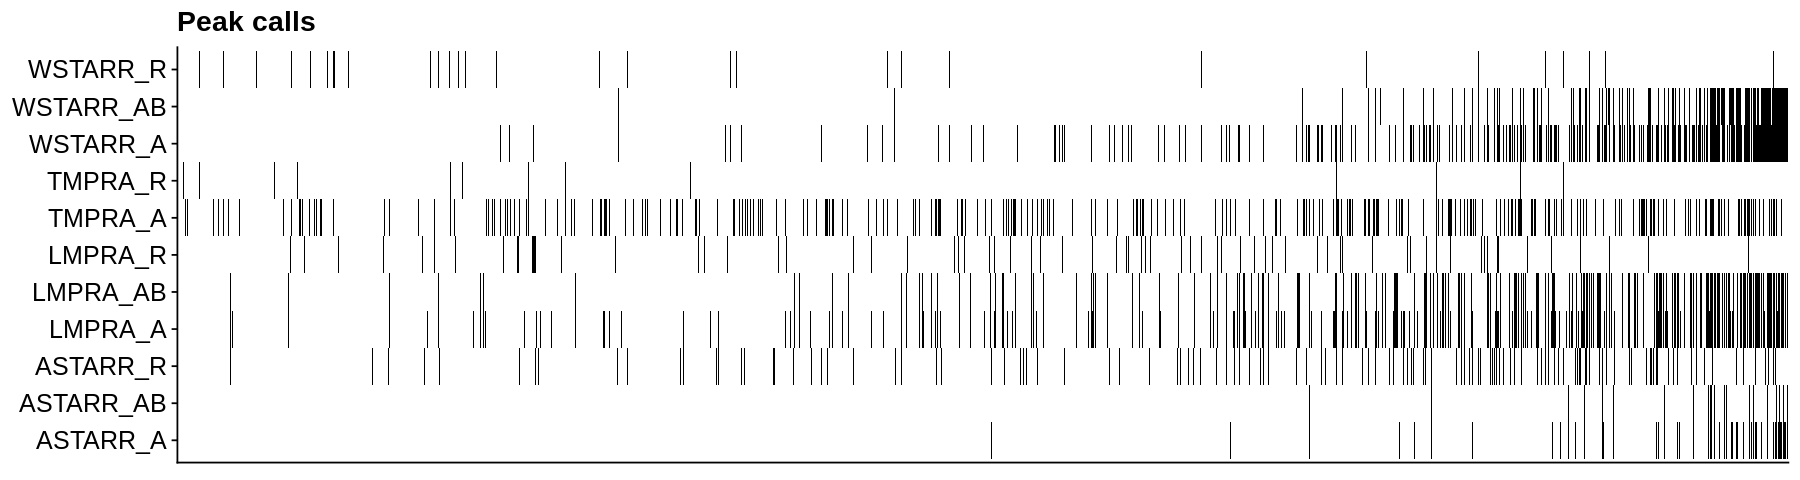

In [103]:
options(repr.plot.height=4, repr.plot.width=15)
lst_gpt[[1]]

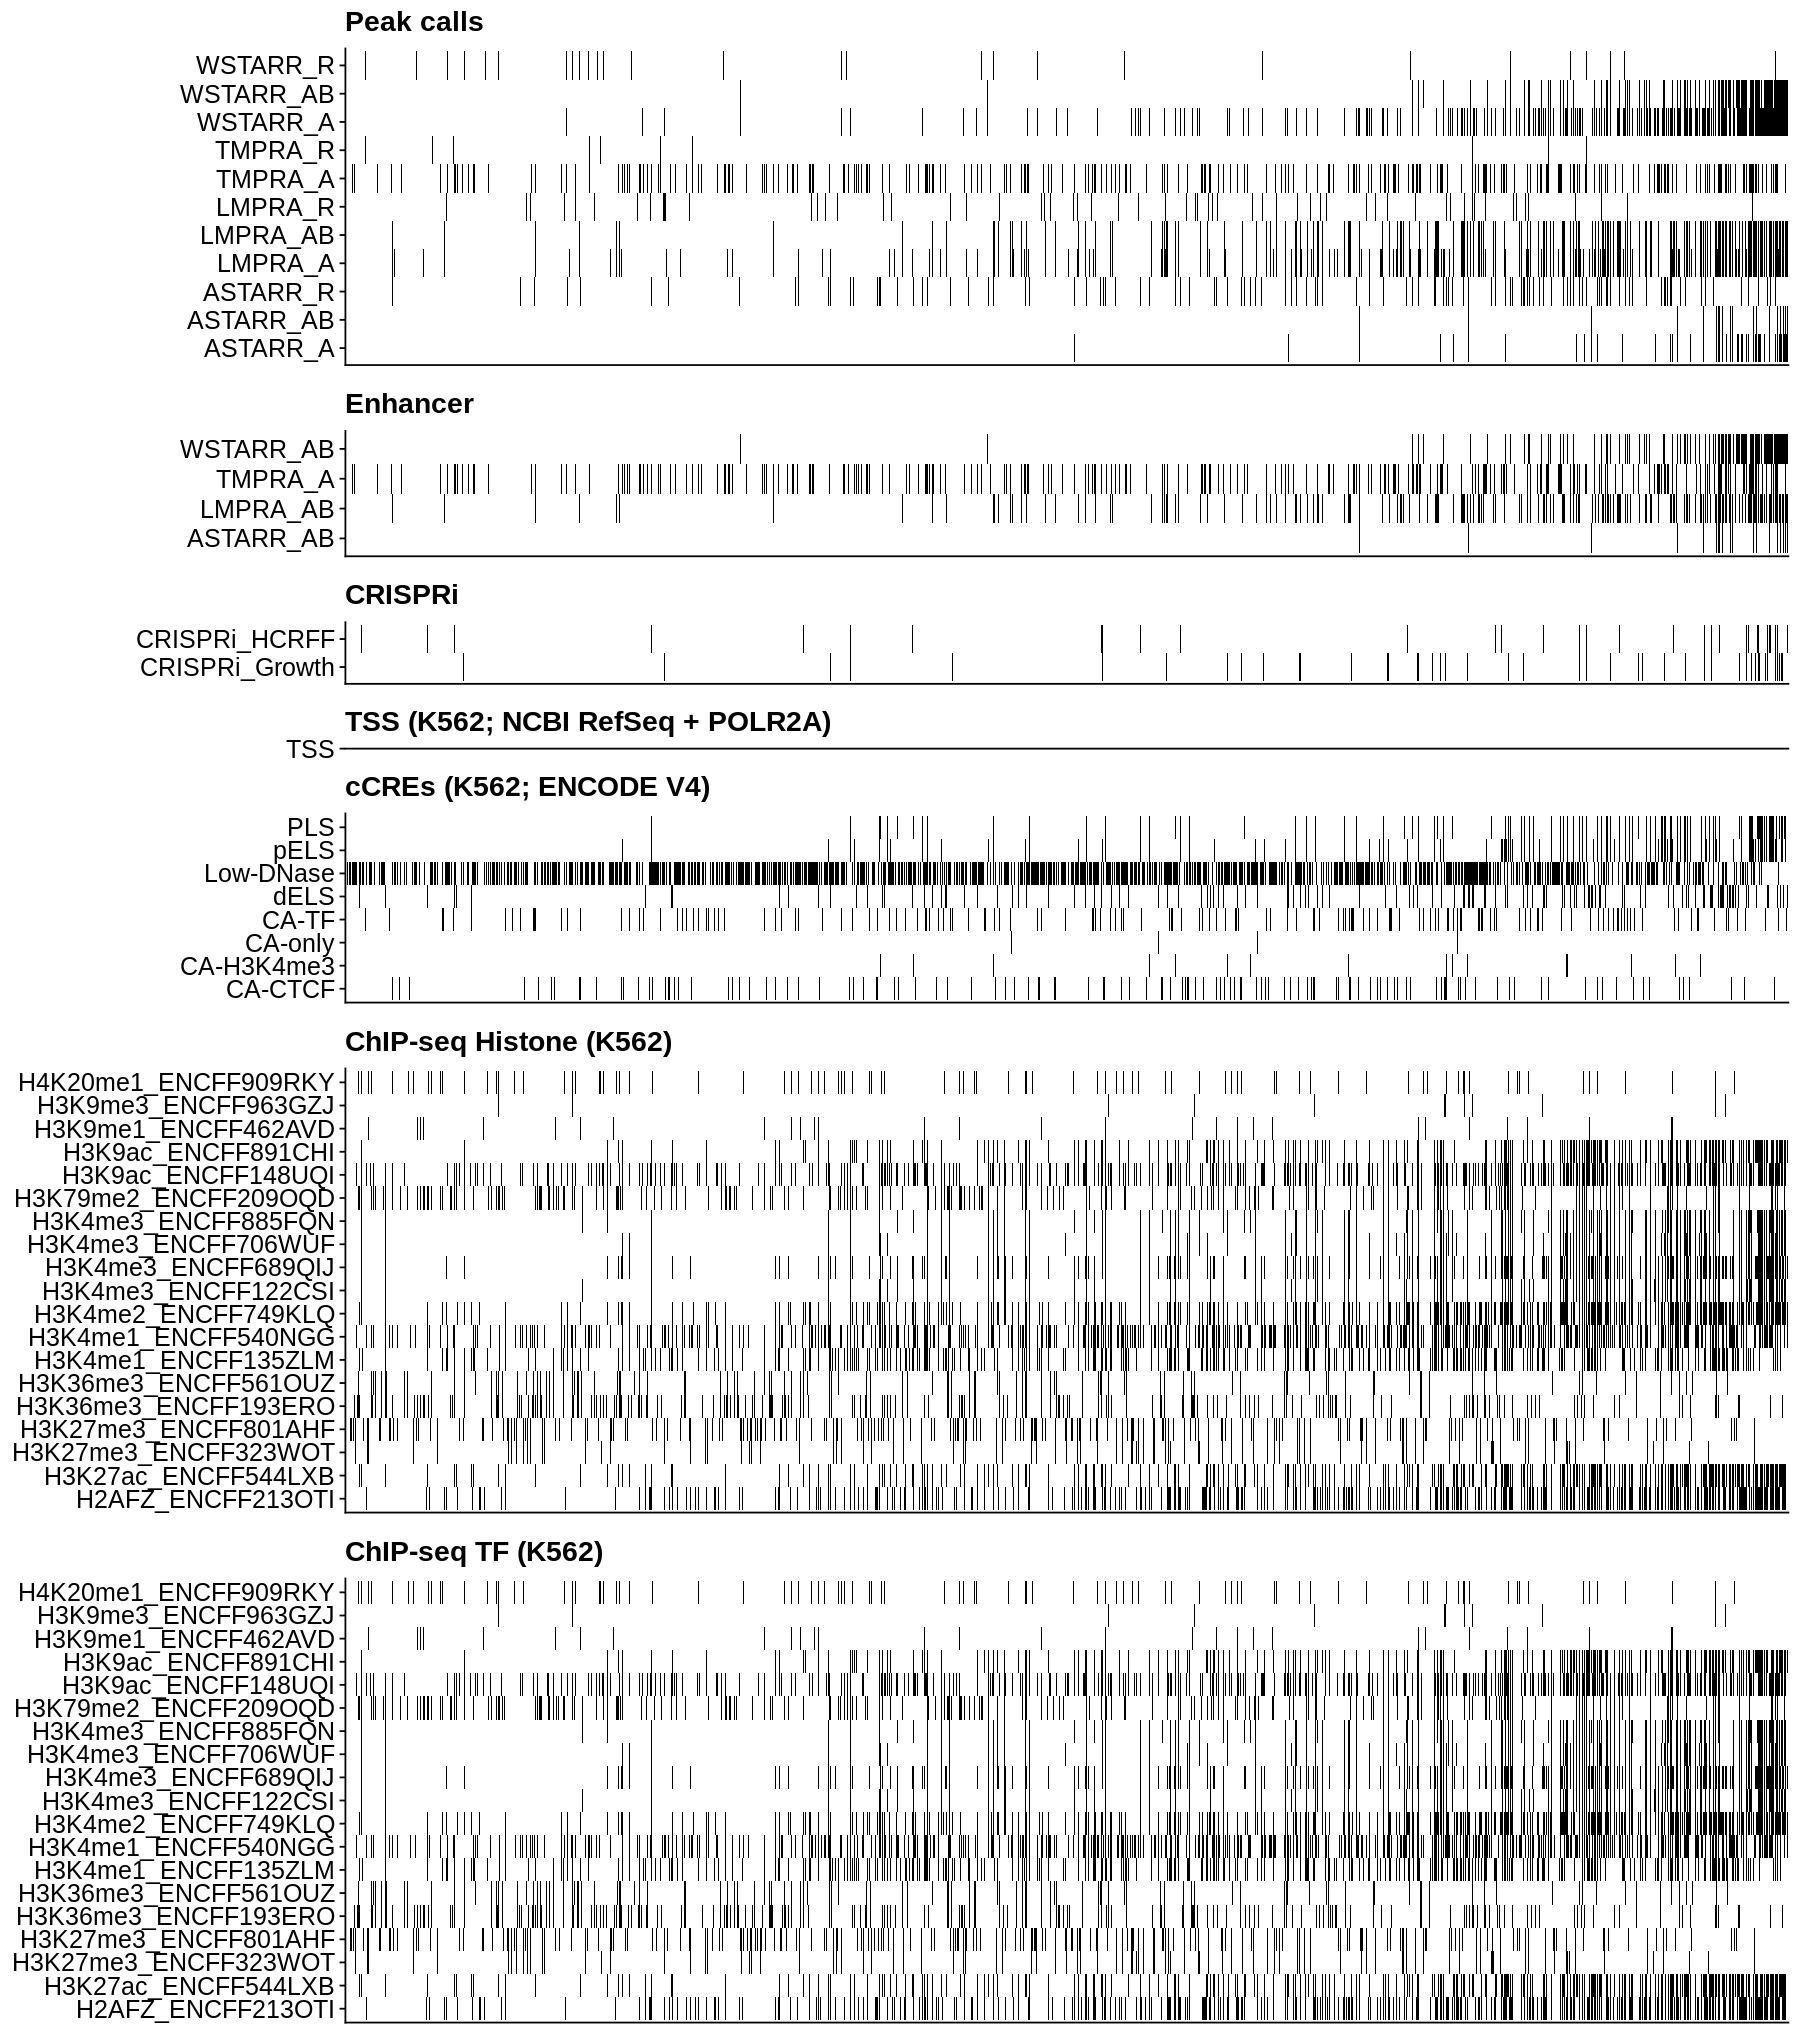

In [106]:
options(repr.plot.height=17, repr.plot.width=15)
plot_grid(
    plotlist = lst_gpt, 
    ncol=1, 
    align="v", 
    rel_heights = c(6, 3, 2, 1, 4, 8, 8))

**Enhancer**

In [71]:
### init
vec = c(
    "ASTARR_AB", "ASTARR_A", "ASTARR_R", 
    "WSTARR_AB", "WSTARR_A", "WSTARR_R", 
                 "TMPRA_A",  "TMPRA_R",
    "LMPRA_AB",  "LMPRA_A",  "LMPRA_R"
)
vec = paste("enhancer_zscore_junke", vec, sep=".")

###
lst = lst_dat_annot
dat = bind_rows(lst[vec])
lst = split(dat, dat$Label)
lst_annot = lst

### init
dat = data.frame(Peak = VEC_PEAKS)

### annotate
for (idx in names(lst_annot)){
    ant = lst_annot[[idx]]
    vec = ant$Peak
    dat[[idx]] = ifelse(dat$Peak %in% vec, "1", "0")
}

### arrange
dat = dat %>% 
    tidyr::gather(Label, Value, -Peak) %>%
    dplyr::mutate(Peak  = factor(Peak,  levels=VEC_PEAKS))

### assign and show
dat_annot_enhancer_starrmpra = dat
print(dim(dat))
head(dat)

[1] 18942     3


,Peak,Label,Value
,<fct>,<chr>,<chr>
1,chrX:48996933-48997220,ASTARR_A,0
2,chr8:128298518-128298762,ASTARR_A,0
3,chr8:128242220-128242507,ASTARR_A,0
4,chr11:34024311-34024546,ASTARR_A,0
5,chr8:128189792-128190210,ASTARR_A,0
6,chr20:56703281-56703575,ASTARR_A,0


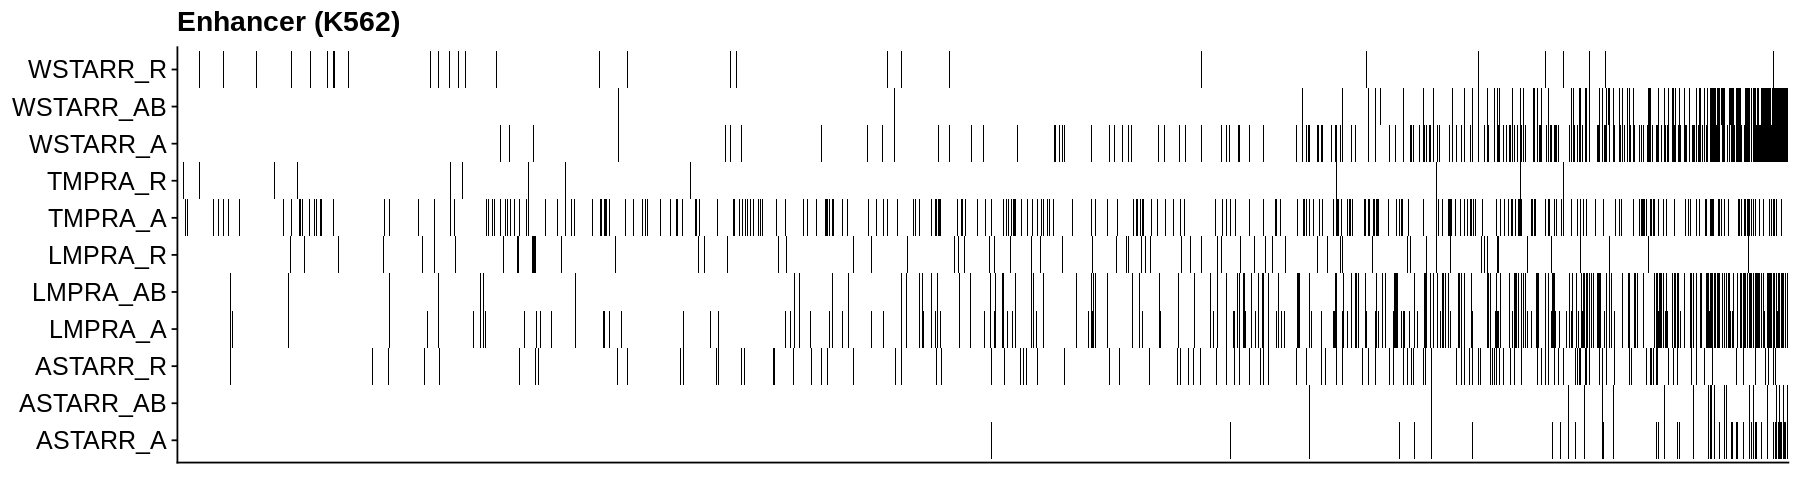

In [74]:
theme_fill   = scale_fill_manual(values = c("1" = "black", "0" = "white"))
theme_text   = THEME_TEXT
theme_legend = theme(legend.position = "none")

txt = "Enhancer (K562)"
dat = dat_annot_enhancer_starrmpra

gpt = ggplot(dat, aes(x=Peak, y=Label, fill=Value)) +
    geom_tile() +
    labs(title = txt) +
    theme_cowplot() +
    theme_fill +
    theme_text +
    theme_legend

#gpt_annot_ccre_v4 = gpt
options(repr.plot.height=4, repr.plot.width=15)
print(gpt)

**Enhancer**

In [45]:
### init
vec = "ccre_v4"

###
lst = lst_dat_annot
dat = bind_rows(lst[vec])
lst = split(dat, dat$Label)
lst_annot = lst

### init
dat = data.frame(Peak = VEC_PEAKS)

### annotate
for (idx in names(lst_annot)){
    ant = lst_annot[[idx]]
    vec = ant$Peak
    dat[[idx]] = ifelse(dat$Peak %in% vec, "1", "0")
}

### arrange
dat = dat %>% 
    tidyr::gather(Label, Value, -Peak) %>%
    dplyr::mutate(Peak  = factor(Peak,  levels=VEC_PEAKS))

### assign and show
dat_annot_ccre_v4 = dat
print(dim(dat))
head(dat)

[1] 13776     3


,Peak,Label,Value
,<fct>,<chr>,<chr>
1,chrX:48996933-48997220,CA-CTCF,0
2,chr8:128298518-128298762,CA-CTCF,0
3,chr8:128242220-128242507,CA-CTCF,0
4,chr11:34024311-34024546,CA-CTCF,0
5,chr8:128189792-128190210,CA-CTCF,0
6,chr20:56703281-56703575,CA-CTCF,0


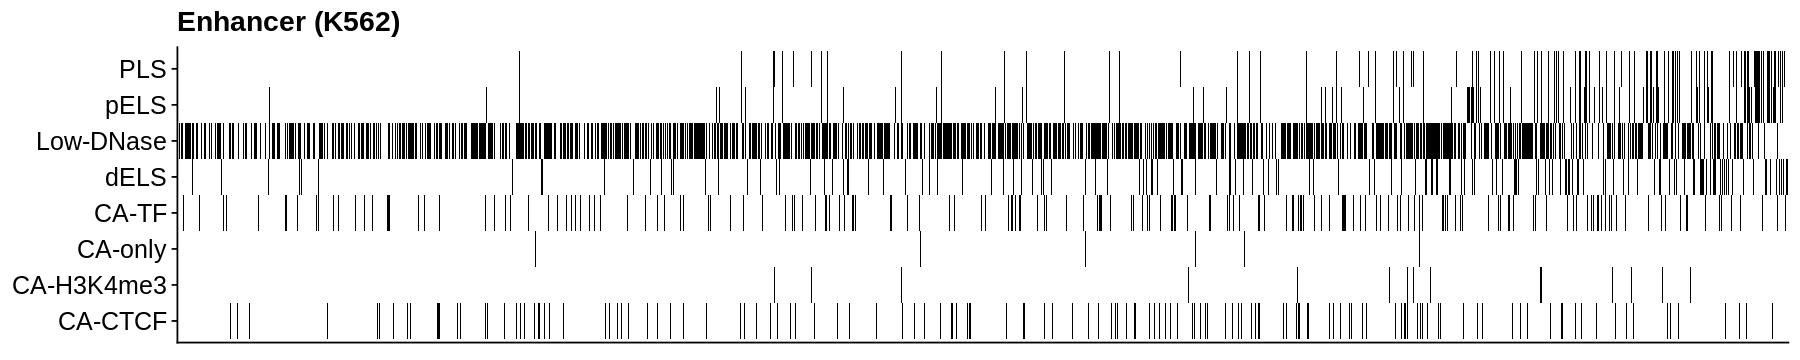

In [46]:
theme_fill   = scale_fill_manual(values = c("1" = "black", "0" = "white"))
theme_text   = THEME_TEXT
theme_legend = theme(legend.position = "none")

txt = "Enhancer (K562)"
dat = dat_annot_ccre_v4

gpt = ggplot(dat, aes(x=Peak, y=Label, fill=Value)) +
    geom_tile() +
    labs(title = txt) +
    theme_cowplot() +
    theme_fill +
    theme_text +
    theme_legend

#gpt_annot_ccre_v4 = gpt
options(repr.plot.height=3, repr.plot.width=15)
print(gpt)

[1] 5166   11


Chrom,Start,End,Peak,TMPRA_Gene,TMPRA_Dataset,CRISPR_HCFF,Assay,Log2FC,RankNorm_Total,Score
<chr>,<dbl>,<dbl>,<fct>,<chr>,<chr>,<chr>,<fct>,<dbl>,<dbl>,<dbl>
chr11,4539569,4540043,chr11:4539569-4540043,HBE1,OL45,"HBE1,HBG1,HBG2,HBS1L,MYB",ASTARR,0.14501695,0.6550523,0.6550523
chr11,4551336,4552012,chr11:4551336-4552012,HBE1,OL45,NA,ASTARR,0.32125162,0.7560976,0.7560976
chr11,4553969,4555012,chr11:4553969-4555012,HBE1,OL45,NA,ASTARR,0.14529397,0.6556330,0.6556330
chr11,4569016,4569992,chr11:4569016-4569992,HBE1,OL45,NA,ASTARR,0.01136464,0.5673635,0.5673635
chr11,4577444,4578031,chr11:4577444-4578031,HBE1,OL45,NA,ASTARR,0.24524353,0.7154472,0.7154472
chr11,4601808,4602487,chr11:4601808-4602487,HBE1,OL45,NA,ASTARR,-0.57215284,0.1277584,0.1277584


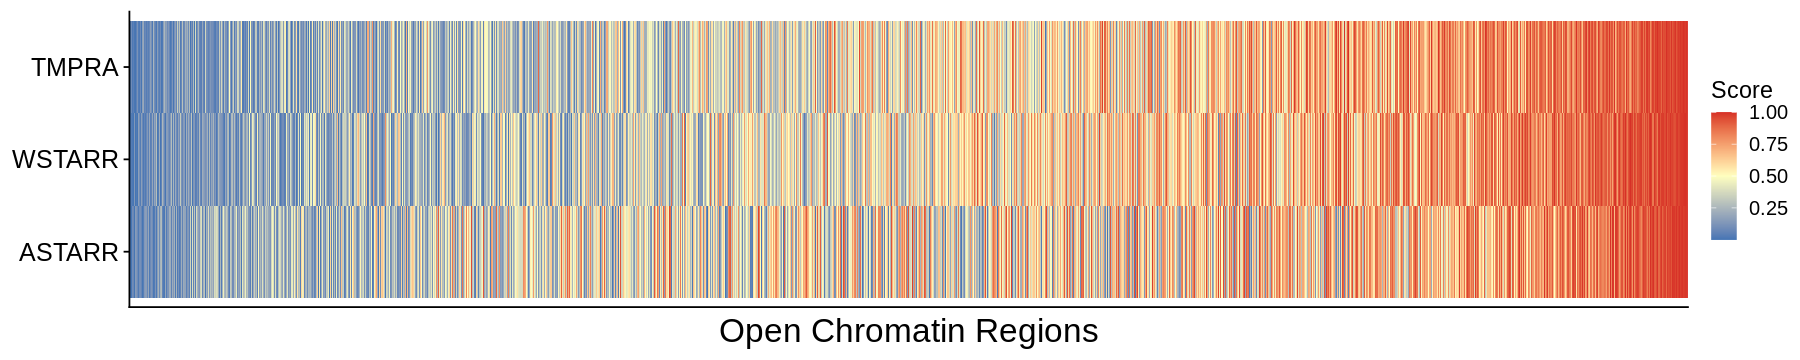